<a href="https://colab.research.google.com/github/Bigballee/Bigballee/blob/main/glaucoma_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
import pathlib

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

# Load data and preprocess it

## Option 1:
Download the dataset directly from the provided link. If this does not work, try Option **2**

In [22]:
dataset_url = 'http://vision.roboslang.org/open_datasets/Fundus_images.zip'


## Option 2:
If downloading the dataset from the link is too slow or the link is no longer working, download the dataset from Brigthspace, and upload it to the sample_data folder in Google Colab. Uncomment the second line in the command below to point to the dataset url


In [27]:
# For option 2, after you have copied the data locally, point the dataset_url to the local path
# Remember to uncomment the line below
dataset_url = '/content/sample_data/datasets/glaucoma_dataset.zip'

In [28]:
out_path = '/content/sample_data/'
archive = tf.keras.utils.get_file(origin=dataset_url, cache_dir='/content/sample_data/', extract=True)

ValueError: unknown url type: '/content/sample_data/datasets/glaucoma_dataset.zip'

In [19]:
# Create a 'pathlib.Path' object for the downloaded archive
# Pathlib module offers classes representing filesystem paths with semantics
# appropriate for different operating systems.
data_dir = pathlib.Path(archive).with_suffix('')

In [20]:
# Count the number of images in a specific directory
image_count = len(list(data_dir.glob('./Train/Glaucoma_Positive/*.jpg')))
print(image_count)

0


In [21]:
#Count number of images
image_count = len(list(data_dir.glob('./Train/Glaucoma_Negative/*.jpg')))
print(image_count)

0


In [13]:
# BEGIN YOUR CODE HERE

# Glaucoma dataset is split into train and test folders. Inside those folders you will
# find additional folders: Glaucoma_Negative and Glaucoma_Positve. You can explore the folders using
# 'Files' tab from the right hand side.
# Tip: use the len() function
image_count = len(list(data_dir.glob('./Test/Glaucoma_Negative/*.jpg')))
print("Test set Glaucoma Negative:", image_count)

image_count = len(list(data_dir.glob('./Test/Glaucoma_Positive/*.jpg')))
print("Test set Glaucoma Positive:", image_count)
# 1a. How many images do we have in training for positive glaucoma? How many for negative glaucoma?
# 1b. How about in the testing set?
# Is the dataset balanced or not?

# END YOUR CODE HERE

Test set Glaucoma Negative: 0
Test set Glaucoma Positive: 0


In [16]:
# Create a list of file paths for glaucoma images
positive_images = list(data_dir.glob('Train/Glaucoma_Positive/*'))
# Open and display the first glaucoma image in the list
PIL.Image.open(str(positive_images[0]))

IndexError: list index out of range

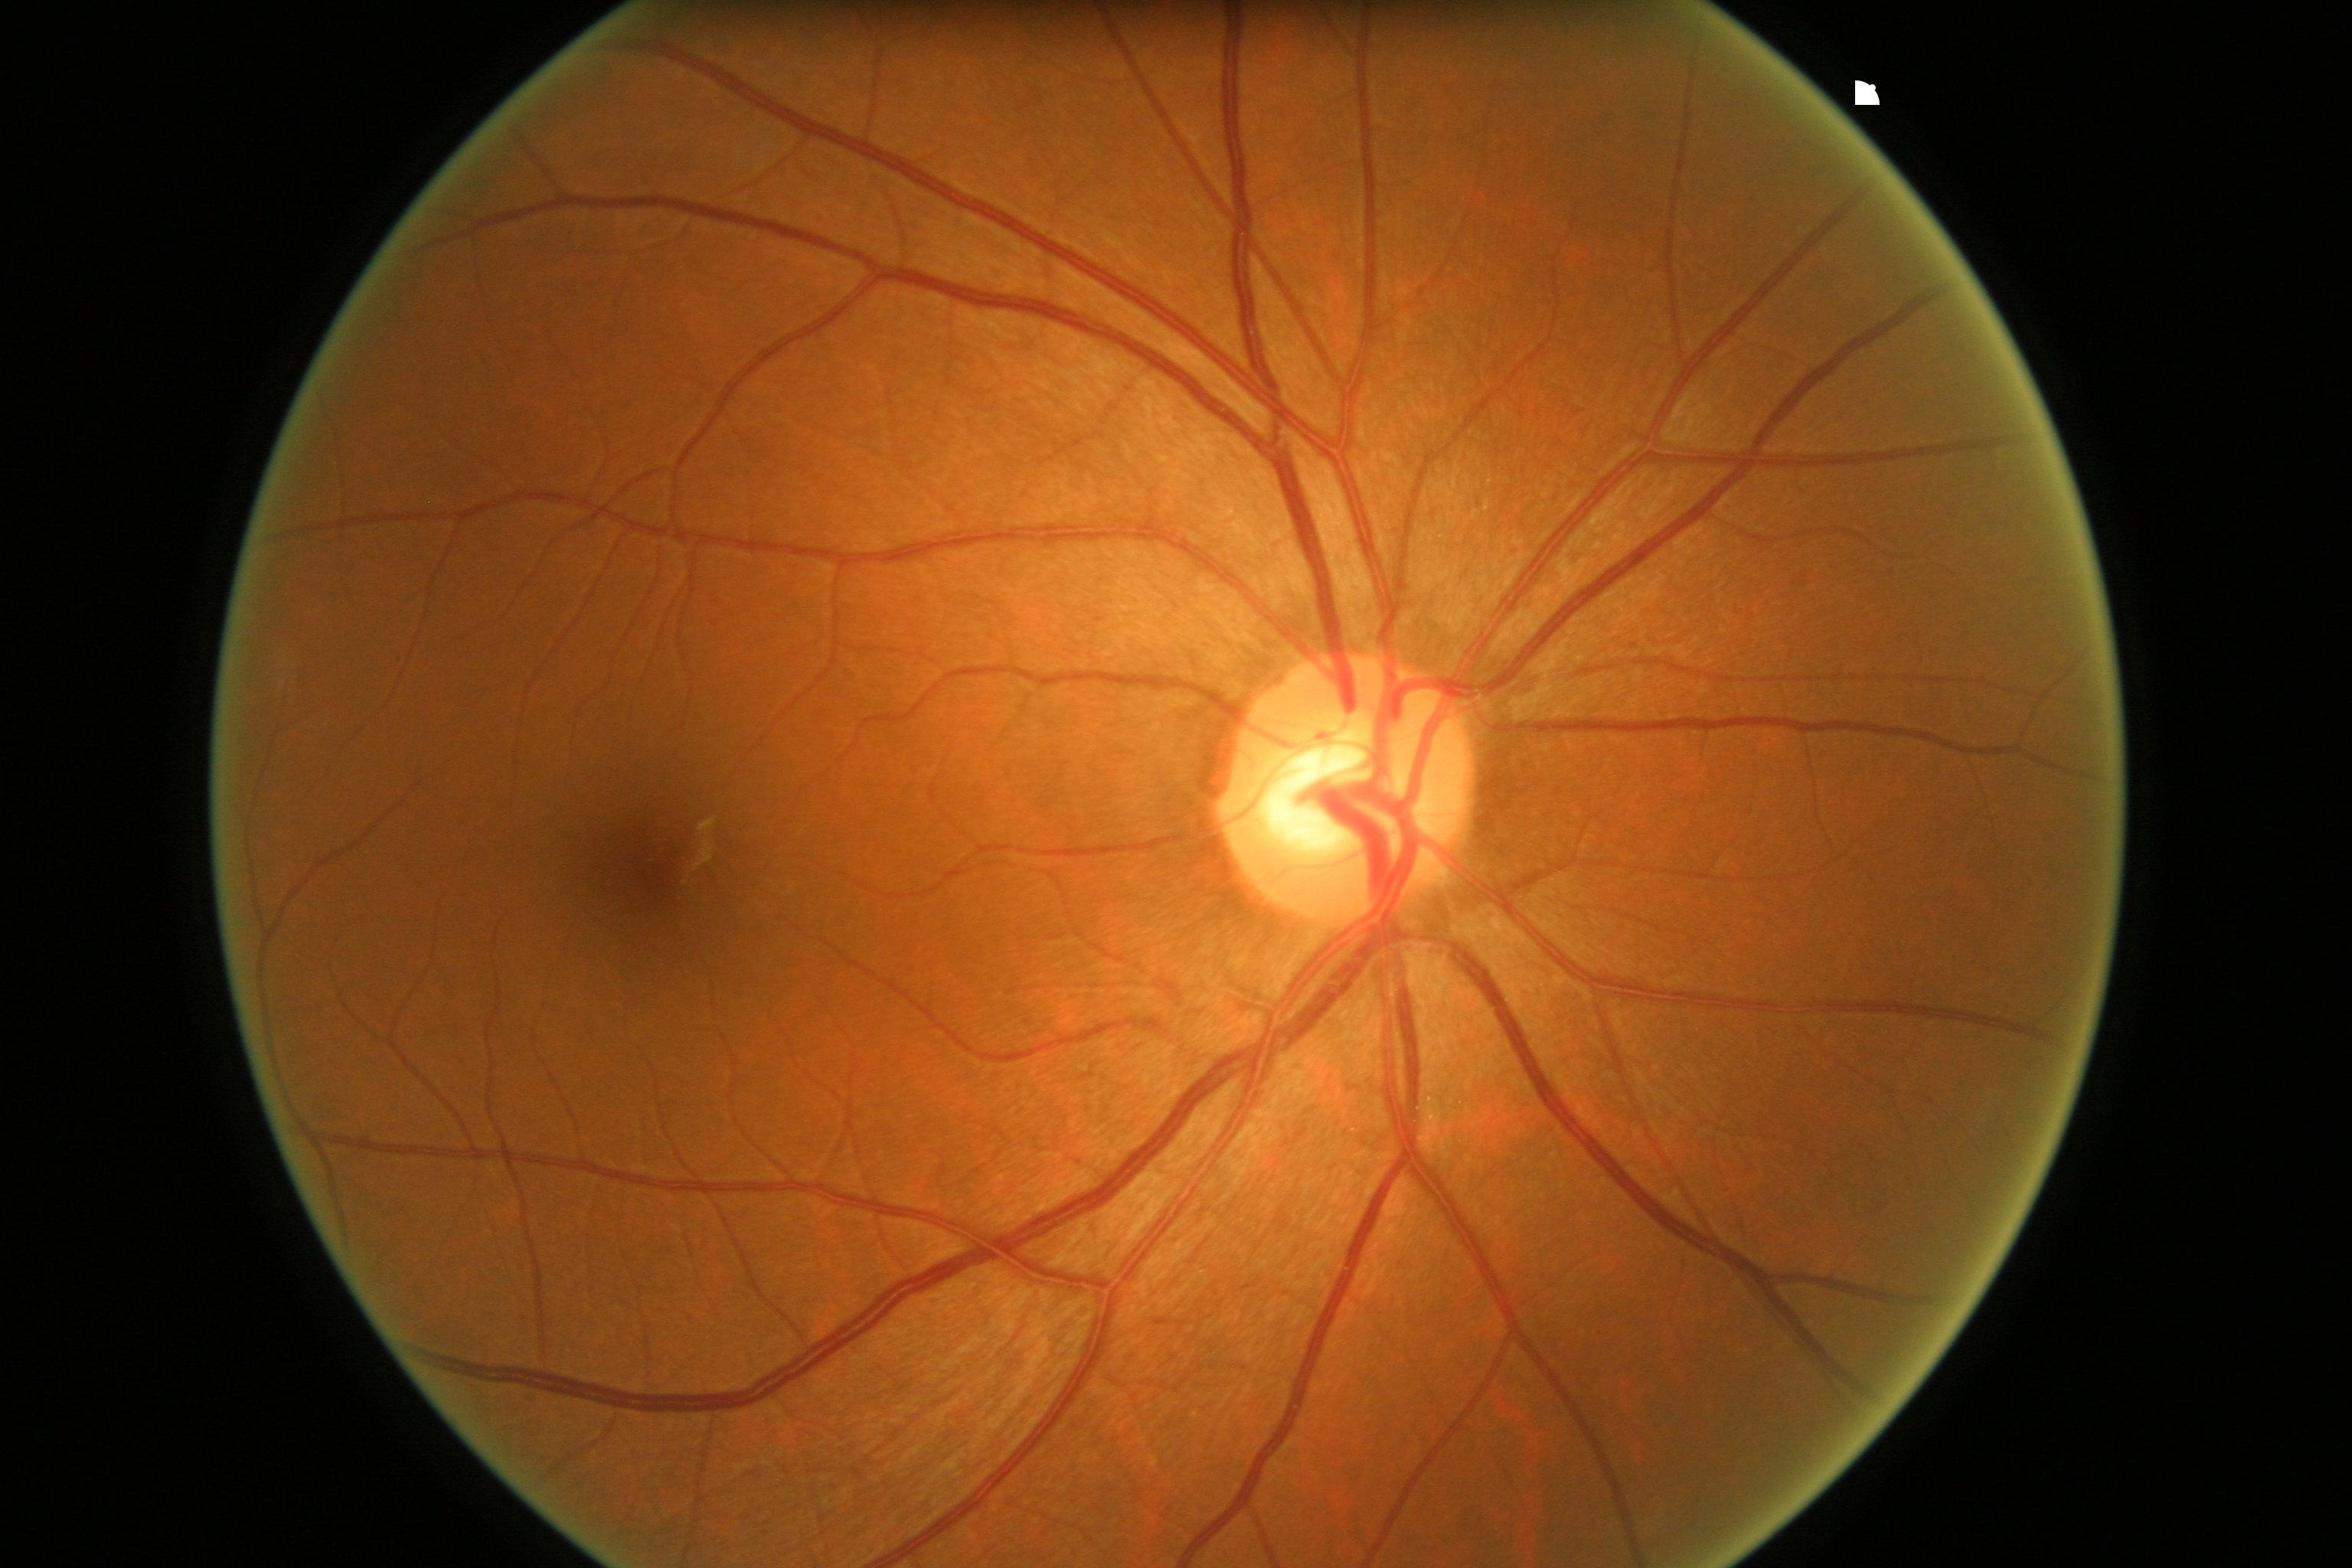

In [ ]:
# BEGIN YOUR CODE HERE

# 2. Display a glaucoma and a normal image from the test dataset
# Create a list of file paths for glaucoma images
negative_images = list(data_dir.glob('Train/Glaucoma_Negative/*'))
# Open and display the first glaucoma image in the list
PIL.Image.open(str(negative_images[0]))



# END YOUR CODE HERE

# Define a deep learning model that will learn the differences between glaucoma and normal fundus images


In [ ]:
# Define batch size and image dimensions for training

# BEGIN YOUR CODE HERE
# The batch size is the number of samples processed before the model is updated.
# Choose an appropriate batch size. What are the images resolutions?

batch_size = 32


# What is the resolution of the images?
# Specify the size to resize images to after they are read from disk.
# Since the pipeline processes batches of images that must all have the same size, this must be provided.
img_height = 224
img_width = 224

# END YOUR CODE HERE

In [ ]:
train_data_dir  = os.path.join(data_dir,'Train')
test_data_dir = os.path.join(data_dir,'Test')

In [ ]:
# Create a TensorFlow image dataset from a directory
# BEGIN YOUR CODE HERE
# Use the function tf.keras.utils.image_dataset_from_directory in order to load
# the training dataset: https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
# 1. First argument is your training directory folder,
# 2. Use 20% of the data for validation, for image size,
# 3. name the subset as "training"
# 4. you can set a seed such that when you repeat experiments you get similar results, eg: seed=123
# 5. for image size use the img_height and img_width variables you defined previously.
# 6. Use for batch size the batch_size variable you defined earlier in the code
train_ds=tf.keras.utils.image_dataset_from_directory(
      directory=train_data_dir,
      validation_split=0.2,
      subset='training',
      seed=123,
      image_size=(img_height, img_width),
      batch_size= batch_size
 )
vals_ds=tf.keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

for images, labels in vals_ds.take(1):
    print("Validation Image batch shape:", images.shape)
    print("Validation Label batch shape:", labels.shape)



# eg: train_ds = tf.keras.utils.image_dataset_from_directory(...)


# Create validation dataset and call that val_ds, by getting the 'validation' subset


# END YOUR CODE HERE

Found 520 files belonging to 2 classes.
Using 416 files for training.
Found 520 files belonging to 2 classes.
Using 104 files for validation.
Validation Image batch shape: (32, 224, 224, 3)
Validation Label batch shape: (32,)


In [ ]:
# Create a layer to normalise pixel values to the [0, 1] range.
# By default, when you load an image, each pixel value will have a value between 0-255
# but, in neural networks, we need as input normalised values in [0,1] interval.
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image), first_image[0][0])

0.0 1.0 tf.Tensor([0.00392157 0.00784314 0.        ], shape=(3,), dtype=float32)


In [ ]:
# BEGIN YOUR CODE HERE
# Define the number of classes in the classification problem
# How many classes do we have in this dataset?
num_classes = 2

# END YOUR CODE HERE

In [ ]:
# BEGIN YOUR CODE HERE
# Define a tensorflow model using the tf.keras.Sequential class: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# The last layer should be a Dense layer with the number of output neurons num_classes
# Use as a starting point the tf.keras.Sequential model defined for the MNIST problem.
# See Lab-DeepLearning-ImageClassification.
# For the first Conv2D layer, you are not required to specify the input shape. If that
# parameter is not given, tensorflow library will infer the size of the input when
# you fit the model, so it will depend on the size of the dataset.
# Important: change the output of the last Dense layer to match the number of classes for this problem.
# If you don't use any of the Dropout layers what accuracy do you get?
# What accuracy do you get with the Dropout layers?


model = tf.keras.Sequential([

      tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers
      .Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(num_classes)
])






# END YOUR CODE HERE

In [ ]:
# Compile the model with an optimizer, loss function, and evaluation metric
# There are several ways in which the loss or error between the label and
# the predictions can be computed. One of them is called SparseCategoricalCrossentropy
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
# You can also experiment with BinaryCrossentropy since for this problem we also have
# two classes, pneumonia vs normal: https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy


model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']) # Monitor accuracy

In [ ]:
# BEGIN YOUR CODE HERE
# Train the model on the provided dataset for a specified number of epochs
# Modify the network architecture such that you maximise the accuracy.
# Tip: aim to get an accuracy of at least 70% on the training set.
# For this, you can use the function fit, as in model.fit(...)
# The first argument is the train_ds variable defined above.
# This variable contains both the x (data - glaucoma and normal images) and y
# (labels - glaucoma vs normal).
# Start training using 5 epochs. What is the accuracy you get?
# How about if you increase the number of epochs?
# Use as validation_data the val_ds variable you defined previously



# END YOUR CODE HERE

In [ ]:


# Extract the loss values for each epoch and display it in a figure
# BEGIN YOUR CODE HERE

# Extract loss values for training and validation from the history object
# Create an array, epochs, containing integers from 1 to the number of epochs (inclusive).


# Plot training and validation loss over epochs


# Add labels, title, grid, and legend


# Show the plot


# END YOUR CODE HERE

In [ ]:
# Let's load the testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
# BEGIN YOUR CODE HERE
# What is the loss and accuracy on the Testing dataset?
# Tip: instead of (x_test, y_test) we used in the lab last week, you can use
# directly test_ds which contains both data and labels
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
# When you print the output of the evaluate function is run, it will return both
# the loss and accuracy, maybe in a  format like [loss_value, accuracy_value]


# END YOUR CODE HERE

In [ ]:
# Try to improve the model such that it performs well on both training and testing datasets.